código html extraido de: https://www.infomoney.com.br/ferramentas/altas-e-baixas/

In [81]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

### Capturando as informações html

In [82]:
html_acoes = """<tbody><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/JHSF3">JHSF3</a></td><td>02/05</td><td>6,89</td><td class="positive sorting_1">5,03</td><td class="positive">5,03</td><td class="positive">5,03</td><td class="positive">27,16</td><td class="positive">7,03</td><td>6,36</td><td>6,89</td><td>41,38 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/PCAR3">PCAR3</a></td><td>02/05</td><td>21,32</td><td class="positive sorting_1">4,86</td><td class="positive">4,87</td><td class="positive">4,87</td><td class="negative">-0,26</td><td class="negative">-43,73</td><td>20,35</td><td>21,75</td><td>132,13 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/BRKM5">BRKM5</a></td><td>02/05</td><td>41,42</td><td class="positive sorting_1">2,98</td><td class="positive">2,98</td><td class="positive">2,98</td><td class="negative">-25,23</td><td class="negative">-7,25</td><td>39,58</td><td>41,78</td><td>136,21 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/SUZB3">SUZB3</a></td><td>02/05</td><td>51,07</td><td class="positive sorting_1">2,94</td><td class="positive">2,94</td><td class="positive">2,94</td><td class="negative">-14,03</td><td class="negative">-24,74</td><td>49,26</td><td>51,07</td><td>399,86 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CMIN3">CMIN3</a></td><td>02/05</td><td>4,84</td><td class="positive sorting_1">2,09</td><td class="negative">-6,92</td><td class="negative">-6,92</td><td class="negative">-28,19</td><td class="negative">-49,43</td><td>4,69</td><td>4,87</td><td>36,37 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/PETZ3">PETZ3</a></td><td>02/05</td><td>15,51</td><td class="positive sorting_1">1,83</td><td class="positive">1,84</td><td class="positive">1,84</td><td class="negative">-5,25</td><td class="negative">-35,70</td><td>14,91</td><td>15,51</td><td>108,14 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/SLCE3">SLCE3</a></td><td>02/05</td><td>51,11</td><td class="positive sorting_1">1,24</td><td class="negative">-3,40</td><td class="negative">-3,40</td><td class="positive">24,84</td><td class="positive">15,22</td><td>49,20</td><td>51,29</td><td>90,74 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/TIMS3">TIMS3</a></td><td>02/05</td><td>13,62</td><td class="positive sorting_1">1,03</td><td class="positive">1,04</td><td class="positive">1,04</td><td class="positive">4,17</td><td class="positive">16,10</td><td>13,35</td><td>13,65</td><td>99,07 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/EZTC3">EZTC3</a></td><td>02/05</td><td>15,77</td><td class="positive sorting_1">0,70</td><td class="positive">0,70</td><td class="positive">0,70</td><td class="negative">-20,94</td><td class="negative">-49,96</td><td>15,50</td><td>15,91</td><td>35,92 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/SBSP3">SBSP3</a></td><td>02/05</td><td>44,83</td><td class="positive sorting_1">0,67</td><td class="positive">0,67</td><td class="positive">0,67</td><td class="positive">13,88</td><td class="positive">6,96</td><td>44,08</td><td>45,20</td><td>166,48 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/POSI3">POSI3</a></td><td>02/05</td><td>7,52</td><td class="positive sorting_1">0,67</td><td class="negative">-3,71</td><td class="negative">-3,71</td><td class="negative">-31,01</td><td class="negative">-30,90</td><td>7,32</td><td>7,64</td><td>20,46 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/LREN3">LREN3</a></td><td>02/05</td><td>23,90</td><td class="positive sorting_1">0,63</td><td class="positive">0,63</td><td class="positive">0,63</td><td class="negative">-1,66</td><td class="negative">-33,83</td><td>23,20</td><td>23,97</td><td>269,76 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/BEEF3">BEEF3</a></td><td>02/05</td><td>13,20</td><td class="positive sorting_1">0,53</td><td class="positive">0,53</td><td class="positive">0,53</td><td class="positive">27,77</td><td class="positive">44,84</td><td>12,85</td><td>13,61</td><td>140,9 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/HAPV3">HAPV3</a></td><td>02/05</td><td>8,81</td><td class="positive sorting_1">0,45</td><td class="positive">0,46</td><td class="positive">0,46</td><td class="negative">-15,13</td><td class="negative">-38,81</td><td>8,61</td><td>8,99</td><td>288,58 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CYRE3">CYRE3</a></td><td>02/05</td><td>14,18</td><td class="positive sorting_1">0,21</td><td class="positive">0,21</td><td class="positive">0,21</td><td class="negative">-6,64</td><td class="negative">-37,39</td><td>13,86</td><td>14,28</td><td>147,34 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/FLRY3">FLRY3</a></td><td>02/05</td><td>14,45</td><td class="positive sorting_1">0,20</td><td class="positive">0,21</td><td class="positive">0,21</td><td class="negative">-16,16</td><td class="negative">-40,67</td><td>14,25</td><td>14,65</td><td>35,72 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/AMER3">AMER3</a></td><td>02/05</td><td>24,01</td><td class="positive sorting_1">0,04</td><td class="positive">0,04</td><td class="positive">0,04</td><td class="negative">-22,04</td><td class="negative">-63,43</td><td>23,22</td><td>24,21</td><td>159,67 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/BBDC4">BBDC4</a></td><td>02/05</td><td>17,97</td><td class="negative sorting_1">-0,05</td><td class="negative">-0,06</td><td class="negative">-0,06</td><td class="positive">3,18</td><td class="negative">-13,47</td><td>17,73</td><td>18,17</td><td>770,6 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/EGIE3">EGIE3</a></td><td>02/05</td><td>41,83</td><td class="negative sorting_1">-0,16</td><td class="negative">-0,17</td><td class="negative">-0,17</td><td class="positive">13,17</td><td class="positive">11,96</td><td>41,18</td><td>42,05</td><td>80,49 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/ASAI3">ASAI3</a></td><td>02/05</td><td>15,25</td><td class="negative sorting_1">-0,19</td><td class="negative">-0,20</td><td class="negative">-0,20</td><td class="positive">18,66</td><td class="negative">-4,68</td><td>14,99</td><td>15,54</td><td>84,02 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/ABEV3">ABEV3</a></td><td>02/05</td><td>14,47</td><td class="negative sorting_1">-0,34</td><td class="negative">-0,34</td><td class="negative">-0,34</td><td class="negative">-6,16</td><td class="positive">0,59</td><td>14,32</td><td>14,71</td><td>328,33 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/EQTL3">EQTL3</a></td><td>02/05</td><td>24,91</td><td class="negative sorting_1">-0,36</td><td class="negative">-2,85</td><td class="negative">-2,85</td><td class="positive">10,17</td><td class="positive">2,22</td><td>24,55</td><td>25,15</td><td>164,78 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/COGN3">COGN3</a></td><td>02/05</td><td>2,44</td><td class="negative sorting_1">-0,40</td><td class="negative">-0,41</td><td class="negative">-0,41</td><td class="negative">-0,81</td><td class="negative">-36,95</td><td>2,41</td><td>2,53</td><td>82,87 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/JBSS3">JBSS3</a></td><td>02/05</td><td>37,69</td><td class="negative sorting_1">-0,42</td><td class="negative">-0,42</td><td class="negative">-0,42</td><td class="negative">-0,69</td><td class="positive">32,70</td><td>37,08</td><td>38,55</td><td>249,23 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/ITUB4">ITUB4</a></td><td>02/05</td><td>23,75</td><td class="negative sorting_1">-0,44</td><td class="negative">-0,50</td><td class="negative">-0,50</td><td class="positive">13,69</td><td class="positive">7,37</td><td>23,44</td><td>24,08</td><td>930,01 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/VALE3">VALE3</a></td><td>02/05</td><td>82,92</td><td class="negative sorting_1">-0,44</td><td class="negative">-0,44</td><td class="negative">-0,44</td><td class="positive">6,36</td><td class="negative">-14,39</td><td>80,64</td><td>83,20</td><td>2,57 B</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CMIG4">CMIG4</a></td><td>02/05</td><td>10,77</td><td class="negative sorting_1">-0,50</td><td class="negative">-26,58</td><td class="negative">-26,58</td><td class="negative">-17,06</td><td class="negative">-4,49</td><td>10,60</td><td>10,88</td><td>318,71 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/MRVE3">MRVE3</a></td><td>02/05</td><td>10,26</td><td class="negative sorting_1">-0,58</td><td class="negative">-0,58</td><td class="negative">-0,58</td><td class="negative">-14,50</td><td class="negative">-40,07</td><td>10,03</td><td>10,34</td><td>66,32 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CRFB3">CRFB3</a></td><td>02/05</td><td>20,45</td><td class="negative sorting_1">-0,58</td><td class="negative">-0,58</td><td class="negative">-0,58</td><td class="positive">34,23</td><td class="negative">-2,93</td><td>19,88</td><td>20,76</td><td>108,62 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/ITSA4">ITSA4</a></td><td>02/05</td><td>9,15</td><td class="negative sorting_1">-0,65</td><td class="negative">-0,65</td><td class="negative">-0,65</td><td class="positive">4,92</td><td class="positive">0,59</td><td>9,00</td><td>9,27</td><td>365,99 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/BBAS3">BBAS3</a></td><td>02/05</td><td>32,98</td><td class="negative sorting_1">-0,72</td><td class="negative">-0,72</td><td class="negative">-0,72</td><td class="positive">17,76</td><td class="positive">20,98</td><td>32,53</td><td>33,57</td><td>350,42 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/TOTS3">TOTS3</a></td><td>02/05</td><td>31,72</td><td class="negative sorting_1">-0,78</td><td class="negative">-0,78</td><td class="negative">-0,78</td><td class="positive">10,75</td><td class="positive">2,71</td><td>31,13</td><td>31,96</td><td>176,36 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/BBDC3">BBDC3</a></td><td>02/05</td><td>14,78</td><td class="negative sorting_1">-0,87</td><td class="negative">-0,87</td><td class="negative">-0,87</td><td class="positive">0,75</td><td class="negative">-17,53</td><td>14,61</td><td>14,95</td><td>127,71 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/USIM5">USIM5</a></td><td>02/05</td><td>11,20</td><td class="negative sorting_1">-0,97</td><td class="negative">-0,97</td><td class="negative">-0,97</td><td class="negative">-22,13</td><td class="negative">-43,44</td><td>11,01</td><td>11,53</td><td>170,29 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/HYPE3">HYPE3</a></td><td>02/05</td><td>37,05</td><td class="negative sorting_1">-0,98</td><td class="negative">-0,99</td><td class="negative">-0,99</td><td class="positive">32,13</td><td class="positive">10,94</td><td>36,21</td><td>37,69</td><td>164,48 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/ENBR3">ENBR3</a></td><td>02/05</td><td>20,97</td><td class="negative sorting_1">-0,99</td><td class="negative">-0,99</td><td class="negative">-0,99</td><td class="positive">10,53</td><td class="positive">23,17</td><td>20,62</td><td>21,28</td><td>59,58 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/PETR4">PETR4</a></td><td>02/05</td><td>29,98</td><td class="negative sorting_1">-0,99</td><td class="negative">-0,99</td><td class="negative">-0,99</td><td class="positive">15,15</td><td class="positive">64,65</td><td>29,33</td><td>30,33</td><td>2,15 B</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/BRAP4">BRAP4</a></td><td>02/05</td><td>27,38</td><td class="negative sorting_1">-1,20</td><td class="negative">-6,52</td><td class="negative">-6,52</td><td class="positive">9,56</td><td class="negative">-33,45</td><td>26,93</td><td>28,00</td><td>100,06 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/LWSA3">LWSA3</a></td><td>02/05</td><td>7,08</td><td class="negative sorting_1">-1,25</td><td class="negative">-1,26</td><td class="negative">-1,26</td><td class="negative">-46,20</td><td class="negative">-75,39</td><td>6,89</td><td>7,39</td><td>94,31 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/VBBR3">VBBR3</a></td><td>02/05</td><td>20,81</td><td class="negative sorting_1">-1,46</td><td class="negative">-1,47</td><td class="negative">-1,47</td><td class="negative">-2,22</td><td class="negative">-5,28</td><td>20,37</td><td>21,12</td><td>181,32 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/MGLU3">MGLU3</a></td><td>02/05</td><td>4,80</td><td class="negative sorting_1">-1,63</td><td class="negative">-1,64</td><td class="negative">-1,64</td><td class="negative">-33,52</td><td class="negative">-76,01</td><td>4,74</td><td>4,97</td><td>391,25 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/ALPA4">ALPA4</a></td><td>02/05</td><td>19,28</td><td class="negative sorting_1">-1,63</td><td class="negative">-1,63</td><td class="negative">-1,63</td><td class="negative">-47,69</td><td class="negative">-50,94</td><td>19,20</td><td>20,01</td><td>80,18 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CSNA3">CSNA3</a></td><td>02/05</td><td>20,03</td><td class="negative sorting_1">-1,75</td><td class="negative">-4,94</td><td class="negative">-4,94</td><td class="negative">-19,21</td><td class="negative">-56,04</td><td>19,45</td><td>20,50</td><td>249,39 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/PETR3">PETR3</a></td><td>02/05</td><td>32,84</td><td class="negative sorting_1">-1,79</td><td class="negative">-1,79</td><td class="negative">-1,79</td><td class="positive">15,99</td><td class="positive">82,21</td><td>32,15</td><td>33,60</td><td>523,42 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CCRO3">CCRO3</a></td><td>02/05</td><td>12,18</td><td class="negative sorting_1">-1,85</td><td class="negative">-1,85</td><td class="negative">-1,85</td><td class="positive">5,78</td><td class="positive">2,50</td><td>12,03</td><td>12,57</td><td>149,47 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/VIVT3">VIVT3</a></td><td>02/05</td><td>52,13</td><td class="negative sorting_1">-1,85</td><td class="negative">-1,99</td><td class="negative">-1,99</td><td class="positive">10,98</td><td class="positive">30,54</td><td>50,82</td><td>53,07</td><td>171,99 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/DXCO3">DXCO3</a></td><td>02/05</td><td>12,63</td><td class="negative sorting_1">-1,86</td><td class="negative">-1,86</td><td class="negative">-1,86</td><td class="negative">-15,57</td><td class="negative">-37,30</td><td>12,34</td><td>12,74</td><td>51,65 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/BBSE3">BBSE3</a></td><td>02/05</td><td>24,95</td><td class="negative sorting_1">-1,88</td><td class="negative">-1,89</td><td class="negative">-1,89</td><td class="positive">25,01</td><td class="positive">19,02</td><td>24,46</td><td>25,51</td><td>163,15 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CPLE6">CPLE6</a></td><td>02/05</td><td>6,79</td><td class="negative sorting_1">-1,90</td><td class="negative">-8,74</td><td class="negative">-8,74</td><td class="positive">7,27</td><td class="positive">19,10</td><td>6,72</td><td>6,94</td><td>116,78 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/BRML3">BRML3</a></td><td>02/05</td><td>9,25</td><td class="negative sorting_1">-1,97</td><td class="negative">-2,53</td><td class="negative">-2,53</td><td class="positive">11,31</td><td class="negative">-2,84</td><td>9,15</td><td>9,55</td><td>139,38 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/VIIA3">VIIA3</a></td><td>02/05</td><td>2,91</td><td class="negative sorting_1">-2,02</td><td class="negative">-2,02</td><td class="negative">-2,02</td><td class="negative">-44,57</td><td class="negative">-75,40</td><td>2,88</td><td>3,00</td><td>150,21 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/GGBR4">GGBR4</a></td><td>02/05</td><td>27,40</td><td class="negative sorting_1">-2,03</td><td class="negative">-2,04</td><td class="negative">-2,04</td><td class="positive">1,21</td><td class="negative">-7,14</td><td>26,61</td><td>28,10</td><td>498,48 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/MULT3">MULT3</a></td><td>02/05</td><td>24,14</td><td class="negative sorting_1">-2,06</td><td class="negative">-2,07</td><td class="negative">-2,07</td><td class="positive">28,95</td><td class="positive">7,63</td><td>23,58</td><td>24,64</td><td>198,31 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/MRFG3">MRFG3</a></td><td>02/05</td><td>18,36</td><td class="negative sorting_1">-2,08</td><td class="negative">-2,08</td><td class="negative">-2,08</td><td class="negative">-11,85</td><td class="positive">12,88</td><td>18,15</td><td>19,01</td><td>64,32 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/YDUQ3">YDUQ3</a></td><td>02/05</td><td>15,78</td><td class="negative sorting_1">-2,10</td><td class="negative">-2,11</td><td class="negative">-2,11</td><td class="negative">-22,65</td><td class="negative">-45,65</td><td>15,50</td><td>16,33</td><td>30,16 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/CPFE3">CPFE3</a></td><td>02/05</td><td>32,20</td><td class="negative sorting_1">-2,15</td><td class="negative">-10,93</td><td class="negative">-10,93</td><td class="positive">20,01</td><td class="positive">25,14</td><td>31,62</td><td>32,90</td><td>128,28 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/SOMA3">SOMA3</a></td><td>02/05</td><td>11,73</td><td class="negative sorting_1">-2,16</td><td class="negative">-2,90</td><td class="negative">-2,90</td><td class="negative">-7,86</td><td class="negative">-3,22</td><td>11,49</td><td>12,10</td><td>75,91 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/RDOR3">RDOR3</a></td><td>02/05</td><td>35,93</td><td class="negative sorting_1">-2,17</td><td class="negative">-2,18</td><td class="negative">-2,18</td><td class="negative">-19,69</td><td class="negative">-48,99</td><td>35,25</td><td>36,75</td><td>123,59 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/BRFS3">BRFS3</a></td><td>02/05</td><td>13,28</td><td class="negative sorting_1">-2,20</td><td class="negative">-2,21</td><td class="negative">-2,21</td><td class="negative">-41,03</td><td class="negative">-36,12</td><td>12,95</td><td>13,70</td><td>119,65 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/RENT3">RENT3</a></td><td>02/05</td><td>51,47</td><td class="negative sorting_1">-2,27</td><td class="negative">-2,78</td><td class="negative">-2,78</td><td class="negative">-2,65</td><td class="negative">-19,24</td><td>50,96</td><td>52,93</td><td>364,84 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CIEL3">CIEL3</a></td><td>02/05</td><td>3,32</td><td class="negative sorting_1">-2,35</td><td class="negative">-2,35</td><td class="negative">-2,35</td><td class="positive">45,61</td><td class="positive">3,05</td><td>3,24</td><td>3,39</td><td>117,79 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/RADL3">RADL3</a></td><td>02/05</td><td>20,43</td><td class="negative sorting_1">-2,38</td><td class="negative">-2,39</td><td class="negative">-2,39</td><td class="negative">-15,79</td><td class="negative">-21,56</td><td>20,22</td><td>21,28</td><td>97,87 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/ENEV3">ENEV3</a></td><td>02/05</td><td>13,37</td><td class="negative sorting_1">-2,55</td><td class="negative">-2,55</td><td class="negative">-2,55</td><td class="negative">-5,51</td><td class="negative">-8,86</td><td>13,26</td><td>13,77</td><td>108,32 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/GOAU4">GOAU4</a></td><td>02/05</td><td>11,07</td><td class="negative sorting_1">-2,55</td><td class="negative">-2,55</td><td class="negative">-2,55</td><td class="negative">-1,88</td><td class="negative">-8,76</td><td>10,85</td><td>11,38</td><td>90,78 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/QUAL3">QUAL3</a></td><td>02/05</td><td>12,92</td><td class="negative sorting_1">-2,63</td><td class="negative">-2,64</td><td class="negative">-2,64</td><td class="negative">-23,55</td><td class="negative">-48,57</td><td>12,70</td><td>13,22</td><td>33,17 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/CASH3">CASH3</a></td><td>02/05</td><td>1,83</td><td class="negative sorting_1">-2,65</td><td class="negative">-2,66</td><td class="negative">-2,66</td><td class="negative">-43,52</td><td class="negative">-66,79</td><td>1,79</td><td>1,92</td><td>37,21 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/NTCO3">NTCO3</a></td><td>02/05</td><td>18,09</td><td class="negative sorting_1">-2,68</td><td class="negative">-2,69</td><td class="negative">-2,69</td><td class="negative">-28,43</td><td class="negative">-62,66</td><td>17,71</td><td>18,70</td><td>242,11 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/EMBR3">EMBR3</a></td><td>02/05</td><td>13,82</td><td class="negative sorting_1">-2,74</td><td class="negative">-2,74</td><td class="negative">-2,74</td><td class="negative">-44,32</td><td class="negative">-10,26</td><td>13,41</td><td>14,35</td><td>155,92 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/LCAM3">LCAM3</a></td><td>02/05</td><td>22,77</td><td class="negative sorting_1">-2,93</td><td class="negative">-3,35</td><td class="negative">-3,35</td><td class="negative">-2,62</td><td class="negative">-12,03</td><td>22,47</td><td>23,56</td><td>57,82 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/ELET6">ELET6</a></td><td>02/05</td><td>38,90</td><td class="negative sorting_1">-3,11</td><td class="negative">-3,11</td><td class="negative">-3,11</td><td class="positive">22,48</td><td class="positive">9,34</td><td>37,56</td><td>39,95</td><td>167,52 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CVCB3">CVCB3</a></td><td>02/05</td><td>12,84</td><td class="negative sorting_1">-3,16</td><td class="negative">-3,17</td><td class="negative">-3,17</td><td class="negative">-4,32</td><td class="negative">-44,29</td><td>12,57</td><td>13,15</td><td>115,75 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/ECOR3">ECOR3</a></td><td>02/05</td><td>6,69</td><td class="negative sorting_1">-3,18</td><td class="negative">-3,18</td><td class="negative">-3,18</td><td class="negative">-8,61</td><td class="negative">-44,39</td><td>6,58</td><td>6,99</td><td>35,35 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/RAIL3">RAIL3</a></td><td>02/05</td><td>15,82</td><td class="negative sorting_1">-3,35</td><td class="negative">-3,36</td><td class="negative">-3,36</td><td class="negative">-10,82</td><td class="negative">-20,81</td><td>15,61</td><td>16,43</td><td>198,91 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/ELET3">ELET3</a></td><td>02/05</td><td>39,07</td><td class="negative sorting_1">-3,48</td><td class="negative">-3,48</td><td class="negative">-3,48</td><td class="positive">19,14</td><td class="positive">8,19</td><td>37,85</td><td>40,33</td><td>279,84 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/CSAN3">CSAN3</a></td><td>02/05</td><td>20,26</td><td class="negative sorting_1">-3,52</td><td class="negative">-3,52</td><td class="negative">-3,52</td><td class="negative">-6,59</td><td class="negative">-7,41</td><td>20,08</td><td>21,01</td><td>167,74 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/UGPA3">UGPA3</a></td><td>02/05</td><td>12,58</td><td class="negative sorting_1">-3,74</td><td class="negative">-3,75</td><td class="negative">-3,75</td><td class="negative">-12,43</td><td class="negative">-38,89</td><td>12,35</td><td>13,09</td><td>145,57 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/B3SA3">B3SA3</a></td><td>02/05</td><td>12,80</td><td class="negative sorting_1">-3,75</td><td class="negative">-3,76</td><td class="negative">-3,76</td><td class="positive">16,83</td><td class="negative">-21,06</td><td>12,54</td><td>13,53</td><td>872,43 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/WEGE3">WEGE3</a></td><td>02/05</td><td>28,94</td><td class="negative sorting_1">-3,85</td><td class="negative">-3,85</td><td class="negative">-3,85</td><td class="negative">-11,52</td><td class="negative">-15,73</td><td>28,48</td><td>30,28</td><td>354,95 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/IRBR3">IRBR3</a></td><td>02/05</td><td>2,66</td><td class="negative sorting_1">-3,97</td><td class="negative">-3,97</td><td class="negative">-3,97</td><td class="negative">-33,83</td><td class="negative">-56,32</td><td>2,63</td><td>2,81</td><td>40,6 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/RRRP3">RRRP3</a></td><td>02/05</td><td>43,87</td><td class="negative sorting_1">-5,10</td><td class="negative">-5,10</td><td class="negative">-5,10</td><td class="positive">30,76</td><td class="positive">0,46</td><td>42,85</td><td>46,36</td><td>315,84 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/PRIO3">PRIO3</a></td><td>02/05</td><td>25,15</td><td class="negative sorting_1">-5,80</td><td class="negative">-5,81</td><td class="negative">-5,81</td><td class="positive">21,67</td><td class="positive">37,31</td><td>24,92</td><td>26,66</td><td>560,34 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/GOLL4">GOLL4</a></td><td>02/05</td><td>14,30</td><td class="negative sorting_1">-5,98</td><td class="negative">-5,98</td><td class="negative">-5,98</td><td class="negative">-16,03</td><td class="negative">-39,02</td><td>14,01</td><td>15,29</td><td>126,77 M</td></tr><tr role="row" class="odd"><td><a href="https://www.infomoney.com.br/BPAN4">BPAN4</a></td><td>02/05</td><td>8,79</td><td class="negative sorting_1">-6,08</td><td class="negative">-6,09</td><td class="negative">-6,09</td><td class="negative">-17,70</td><td class="negative">-51,12</td><td>8,57</td><td>9,41</td><td>56,35 M</td></tr><tr role="row" class="even"><td><a href="https://www.infomoney.com.br/AZUL4">AZUL4</a></td><td>02/05</td><td>20,39</td><td class="negative sorting_1">-7,19</td><td class="negative">-7,19</td><td class="negative">-7,19</td><td class="negative">-16,30</td><td class="negative">-47,04</td><td>20,01</td><td>22,16</td><td>204,1 M</td></tr></tbody> """

In [83]:
soup = BeautifulSoup(html_acoes, 'html.parser')

In [84]:
lista_acoes = soup.find_all('tbody')
lista_acoes

[<tbody><tr class="odd" role="row"><td><a href="https://www.infomoney.com.br/JHSF3">JHSF3</a></td><td>02/05</td><td>6,89</td><td class="positive sorting_1">5,03</td><td class="positive">5,03</td><td class="positive">5,03</td><td class="positive">27,16</td><td class="positive">7,03</td><td>6,36</td><td>6,89</td><td>41,38 M</td></tr><tr class="even" role="row"><td><a href="https://www.infomoney.com.br/PCAR3">PCAR3</a></td><td>02/05</td><td>21,32</td><td class="positive sorting_1">4,86</td><td class="positive">4,87</td><td class="positive">4,87</td><td class="negative">-0,26</td><td class="negative">-43,73</td><td>20,35</td><td>21,75</td><td>132,13 M</td></tr><tr class="odd" role="row"><td><a href="https://www.infomoney.com.br/BRKM5">BRKM5</a></td><td>02/05</td><td>41,42</td><td class="positive sorting_1">2,98</td><td class="positive">2,98</td><td class="positive">2,98</td><td class="negative">-25,23</td><td class="negative">-7,25</td><td>39,58</td><td>41,78</td><td>136,21 M</td></tr><tr 

### explorando o código html

In [85]:
lista = soup.find_all('a',{'href': re.compile('https://www.infomoney.com.br/*')})
len(lista) 

84

In [86]:
lista1 = soup.find_all('tr',{'class': re.compile('odd')})
lista1[0]

<tr class="odd" role="row"><td><a href="https://www.infomoney.com.br/JHSF3">JHSF3</a></td><td>02/05</td><td>6,89</td><td class="positive sorting_1">5,03</td><td class="positive">5,03</td><td class="positive">5,03</td><td class="positive">27,16</td><td class="positive">7,03</td><td>6,36</td><td>6,89</td><td>41,38 M</td></tr>

In [87]:
lista1[0].contents[2].text

'6,89'

In [88]:
lista2 = lista1[0]
lista2.contents[3].text

'5,03'

### extraindo as informações

In [89]:
lista_dados = []
for acao in soup.find_all('tr',{'class': re.compile('odd')}):
    nome = acao.contents[0].text
    data = acao.contents[1].text
    ultimo_valor = acao.contents[2].text
    variacao_diaria = acao.contents[3].text
    variacao_sem = acao.contents[4].text
    variacao_mes = acao.contents[5].text
    variacao_ano = acao.contents[6].text  
    variacao_12m = acao.contents[7].text
    valor_min = acao.contents[8].text
    valor_max = acao.contents[9].text
    volume = acao.contents[10].text
    
    lista_dados.append((nome,data,ultimo_valor,variacao_diaria,variacao_sem,variacao_mes,
                       variacao_ano,variacao_12m,valor_min,valor_max,volume))
    

### criando o dataframe

In [90]:
df_dados = pd.DataFrame(lista_dados, columns=['acao','data','ultimo_valor','variacao_diaria(%)','variacao_sem(%)',
                                             'variacao_mes(%)','variacao_ano(%)','variacao_12m(%)','valor_min','valor_max','volume(em milhao)'])
df_dados.head(10)       

,acao,data,ultimo_valor,variacao_diaria(%),variacao_sem(%),variacao_mes(%),variacao_ano(%),variacao_12m(%),valor_min,valor_max,volume(em milhao)
0,JHSF3,02/05,"6,89","5,03","5,03","5,03","27,16","7,03","6,36","6,89","41,38 M"
1,BRKM5,02/05,"41,42","2,98","2,98","2,98","-25,23","-7,25","39,58","41,78","136,21 M"
2,CMIN3,02/05,"4,84","2,09","-6,92","-6,92","-28,19","-49,43","4,69","4,87","36,37 M"
3,SLCE3,02/05,"51,11","1,24","-3,40","-3,40","24,84","15,22","49,20","51,29","90,74 M"
4,EZTC3,02/05,"15,77","0,70","0,70","0,70","-20,94","-49,96","15,50","15,91","35,92 M"
5,POSI3,02/05,"7,52","0,67","-3,71","-3,71","-31,01","-30,90","7,32","7,64","20,46 M"
6,BEEF3,02/05,"13,20","0,53","0,53","0,53","27,77","44,84","12,85","13,61","140,9 M"
7,CYRE3,02/05,"14,18","0,21","0,21","0,21","-6,64","-37,39","13,86","14,28","147,34 M"
8,AMER3,02/05,"24,01","0,04","0,04","0,04","-22,04","-63,43","23,22","24,21","159,67 M"
9,EGIE3,02/05,"41,83","-0,16","-0,17","-0,17","13,17","11,96","41,18","42,05","80,49 M"


In [91]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   acao                42 non-null     object
 1   data                42 non-null     object
 2   ultimo_valor        42 non-null     object
 3   variacao_diaria(%)  42 non-null     object
 4   variacao_sem(%)     42 non-null     object
 5   variacao_mes(%)     42 non-null     object
 6   variacao_ano(%)     42 non-null     object
 7   variacao_12m(%)     42 non-null     object
 8   valor_min           42 non-null     object
 9   valor_max           42 non-null     object
 10  volume(em milhao)   42 non-null     object
dtypes: object(11)
memory usage: 1.9+ KB


### Fazendo alguns tratamentos no dataframe

In [92]:
df_dados.dtypes

acao                  object
data                  object
ultimo_valor          object
variacao_diaria(%)    object
variacao_sem(%)       object
variacao_mes(%)       object
variacao_ano(%)       object
variacao_12m(%)       object
valor_min             object
valor_max             object
volume(em milhao)     object
dtype: object

In [93]:
# criando a coluna 'dia'
for data in df_dados['data']: 
    df_dados['dia'] = data + '/22'

In [94]:
# excluindo a coluna 'data'
df_dados = df_dados.drop(columns=['data'])

In [95]:
df_dados['dia'] = pd.to_datetime(df_dados['dia'])
df_dados.head(5)

,acao,ultimo_valor,variacao_diaria(%),variacao_sem(%),variacao_mes(%),variacao_ano(%),variacao_12m(%),valor_min,valor_max,volume(em milhao),dia
0,JHSF3,"6,89","5,03","5,03","5,03","27,16","7,03","6,36","6,89","41,38 M",2022-02-05
1,BRKM5,"41,42","2,98","2,98","2,98","-25,23","-7,25","39,58","41,78","136,21 M",2022-02-05
2,CMIN3,"4,84","2,09","-6,92","-6,92","-28,19","-49,43","4,69","4,87","36,37 M",2022-02-05
3,SLCE3,"51,11","1,24","-3,40","-3,40","24,84","15,22","49,20","51,29","90,74 M",2022-02-05
4,EZTC3,"15,77","0,70","0,70","0,70","-20,94","-49,96","15,50","15,91","35,92 M",2022-02-05


In [96]:
df_dados['volume(em milhao)'] = df_dados['volume(em milhao)'].str.replace('M', '')
df_dados['volume(em milhao)'] = df_dados['volume(em milhao)'].str.replace('B', '')

In [97]:
colunas = ['ultimo_valor', 'variacao_diaria(%)','variacao_sem(%)','variacao_mes(%)','variacao_ano(%)','variacao_12m(%)',
          'valor_min','valor_max','volume(em milhao)']
df_dados[colunas] = df_dados[colunas].apply(lambda x: x.str.replace(',', '.').astype('float'))

In [98]:
df_dados.dtypes

acao                          object
ultimo_valor                 float64
variacao_diaria(%)           float64
variacao_sem(%)              float64
variacao_mes(%)              float64
variacao_ano(%)              float64
variacao_12m(%)              float64
valor_min                    float64
valor_max                    float64
volume(em milhao)            float64
dia                   datetime64[ns]
dtype: object

In [99]:
from matplotlib import pyplot as plt

### As 10 ações que mais variaram no dia

In [100]:
maiores = df_dados.sort_values(by='variacao_diaria(%)', ascending=False).head(10)

<BarContainer object of 10 artists>

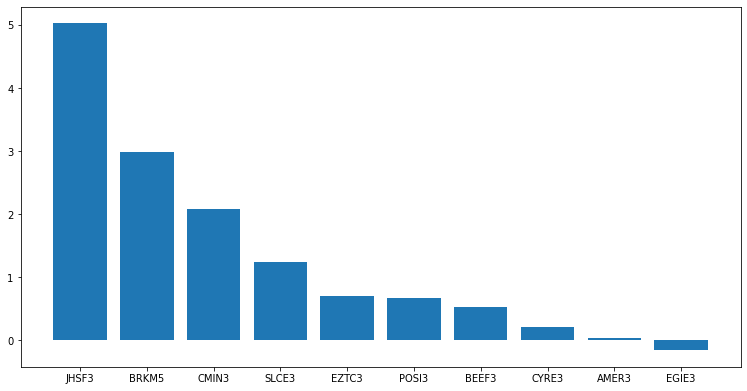

In [101]:
janela = plt.figure(figsize=(10,5))
grafico = janela.add_axes([0,0,1,1])
grafico.bar(maiores['acao'], maiores['variacao_diaria(%)'])